In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [44]:
dataset=pd.read_csv("Position_Salaries.csv")
x= dataset.iloc[:,1:-1].values
y= dataset.iloc[:,-1].values
print(x)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [45]:
y=y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [46]:
from sklearn.preprocessing import StandardScaler
scx=StandardScaler()
scy=StandardScaler()
x=scx.fit_transform(x)
y=scy.fit_transform(y)

In [47]:
print(x)

print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [48]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(x,y)

C:\Users\sameet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [52]:
scy.inverse_transform(regressor.predict(scx.transform([[6.5]])))

array([170370.0204065])

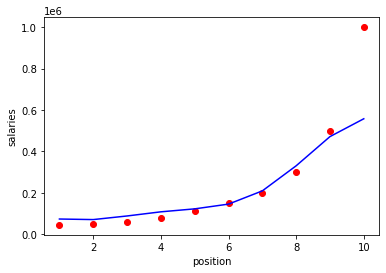

In [53]:
plt.scatter(scx.inverse_transform(x),scy.inverse_transform(y),color="red")
plt.plot(scx.inverse_transform(x),scy.inverse_transform(regressor.predict(x)),color="blue")
plt.xlabel("position")
plt.ylabel("salaries")
plt.show()